# **Task 3**

# **Author -  Manish Aggarwal**
# **Handwritten Digit Recognization**
# **Dataset - https://www.kaggle.com/dillsunnyb11/digit-recognizer**


## **Importing libraries**


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
plt.style.use('seaborn')
import pickle

In [2]:
cd /content/drive/MyDrive/the intern academy/task 3 - handwritten digits/dataset/dataset

/content/drive/MyDrive/the intern academy/task 3 - handwritten digits/dataset/dataset


## **Loading data in pandas DataFrame**

In [3]:
digits_train_df = pd.read_csv("train.csv")
digits_test_df = pd.read_csv("test.csv")

## **Exploring Data**

In [4]:
digits_train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
digits_test_df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
digits_train_df.shape

(42000, 785)

**1. Training Dataset have 42000 rows and 785 columns**

**2. Each column represent the pixel value of digit**

In [7]:
digits_test_df.shape

(28000, 784)

**1. Test Dataset have 28000 rows and 784 columns**

**2. Each column represent the pixel value of handwritten digit**

In [8]:
digits_train_df.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.00000,42000.000000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,...,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00300,0.011190,0.005143,0.000214,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000381,0.001310,0.010548,0.027262,0.050905,0.066405,0.129571,...,3.772524,2.748905,1.796452,1.089905,0.563190,0.239571,0.093524,0.024833,0.000857,0.001405,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.006143,0.035833,0.082357,0.114905,0.178714,0.301452,0.413643,0.513667,0.558833,0.677857,0.60281,0.489238,0.340214,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.56812,1.626927,1.053972,0.043916,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.078072,0.232634,1.131661,2.310396,3.121847,3.259128,4.992894,...,26.957829,22.879248,18.595109,14.434439,10.517823,6.469315,3.976306,1.846016,0.139556,0.287891,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.949803,2.350859,3.934280,4.543583,5.856772,7.219742,8.928286,10.004069,10.129595,11.254931,10.69603,9.480066,7.950251,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

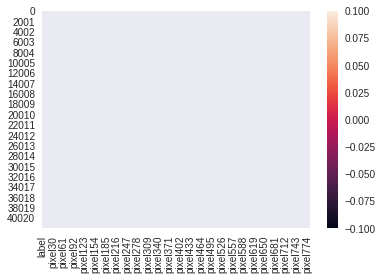

In [9]:
sns.heatmap(digits_train_df.isnull());
plt.show();

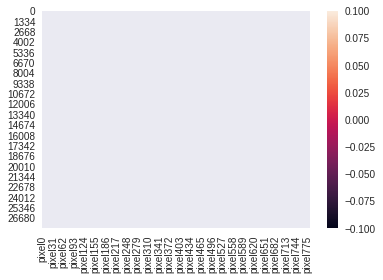

In [10]:
sns.heatmap(digits_test_df.isnull());
plt.show();

**No Missing Values**

## **Let's check value count of each digit in the training dataset**

In [11]:
digits_train_df['label'].value_counts().sort_values(ascending = False)  #to get count of every digit 

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

**1. Training Dataset have more images of 1 than any other digit**



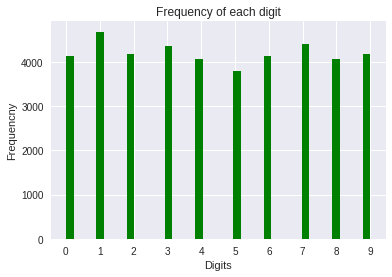

In [82]:
plt.hist(digits_train_df['label'], bins = 40, color = "G")
plt.xlabel("Digits")
plt.xticks(digits_train_df.label.unique())
plt.ylabel("Frequencny")
plt.title("Frequency of each digit")
plt.show();

## **Visualization of digits**

In [13]:
X = digits_train_df.drop("label" , axis = 1)  #splitting data 
y = digits_train_df.label

In [14]:
def plot_digit(X,y,column):   # function to plot digits 
  plt.figure(figsize=(2,2))
  numpy_array = np.array(X)  #to plot we need data as an array
  
  plt_img = numpy_array[column].reshape(28,28)  # resahping data into 28 * 28 
  plt.imshow(plt_img,cmap = "viridis" , interpolation="nearest")
  plt.axis('off')
  numpy_label = np.array(y)  # converting target values into array
  
  plt.title(f'Label of digit -->  {numpy_label[column]}') #setting the title
  

  plt.show()

  


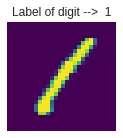

In [15]:
plot_digit(X,y,0)

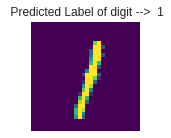

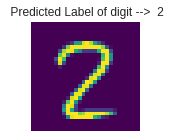

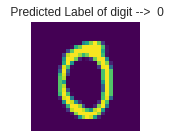

In [83]:
for i in np.random.randint(0,digits_train_df.shape[0],3):  #plotting some values in the range of 0 to 4
  plot_digit(X,y,i)

## **Train test split**

In [17]:
X_train, X_test , y_train , y_test = train_test_split(X,y ,random_state = 42 , test_size = 0.2)   #spliting data in 8:2 for training and testing

In [18]:
print(f'shape of X_train:{X_train.shape} ,shape of y_train:{y_train.shape}\nshape of X_test:{X_test.shape},shape of y_test:{y_test.shape} ')

shape of X_train:(33600, 784) ,shape of y_train:(33600,)
shape of X_test:(8400, 784),shape of y_test:(8400,) 


## **Training Classification Model**

In [19]:
mnb_clf = MultinomialNB()  
rf_clf  = RandomForestClassifier()

In [20]:
def makeprediction(model1,X_train,X_test,y_train,y_test , dump = 0): #  function to make predictions
  model = model1.fit(X_train,y_train) 
  model_score = model.score(X_train,y_train)
  model_score_test = model.score(X_test , y_test)
  predictions = model.predict(X_test)
  accuracy = accuracy_score(predictions,y_test)
  print(f' model score on train set : {model_score} \n model score on test set : {model_score_test} \n Accuracy score is : {accuracy}')
  
  if dump ==1:
      file = open("model.pkl",'wb')
      pickle.dump(model,file)

In [21]:
makeprediction(mnb_clf,X_train,X_test,y_train,y_test)

 model score on train set : 0.8265476190476191 
 model score on test set : 0.8275 
 Accuracy score is : 0.8275


In [22]:
makeprediction(rf_clf,X_train,X_test,y_train,y_test)

 model score on train set : 1.0 
 model score on test set : 0.9626190476190476 
 Accuracy score is : 0.9626190476190476


**1. MNB classifier give - 82.75% accuracy**

**2. RandomForestClassifier give - 96.47% accuracy**

## **Saving Random forest model**

In [23]:
makeprediction(rf_clf,X_train,X_test,y_train,y_test,1) #here dump =  1 so it will automatically save model

 model score on train set : 1.0 
 model score on test set : 0.9648809523809524 
 Accuracy score is : 0.9648809523809524


## **Loading model and making predictions on test set**

In [27]:
pickle_model = open('model.pkl','rb')
forest = pickle.load(pickle_model)

In [28]:
test_predictions = forest.predict(digits_test_df)

In [32]:
test_predictions

array([2, 0, 9, ..., 3, 9, 2])

In [31]:
test_predictions.shape

(28000,)

## **Visualizing Actual and predicted digits**

In [35]:
def plot_test_digit(X,y,column):  #function to plot digits
  plt.figure(figsize=(2,2))
  numpy_array = np.array(X)
  
  plt_img = numpy_array[column].reshape(28,28)
  plt.imshow(plt_img,cmap = "viridis" , interpolation="nearest")
  plt.axis('off')
  numpy_label = np.array(y)
  
  plt.title(f' Predicted Label of digit -->  {numpy_label[column]}')
  

  plt.show()

  


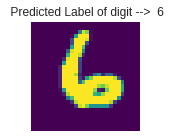

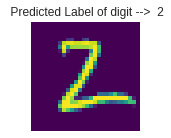

In [76]:
for i in np.random.randint(0,digits_test_df.shape[0],size = 2): #plotting some random digits
  plot_test_digit(digits_test_df,test_predictions,i)